# Why Pandas?

## A more relevant question: Why DataFrames?

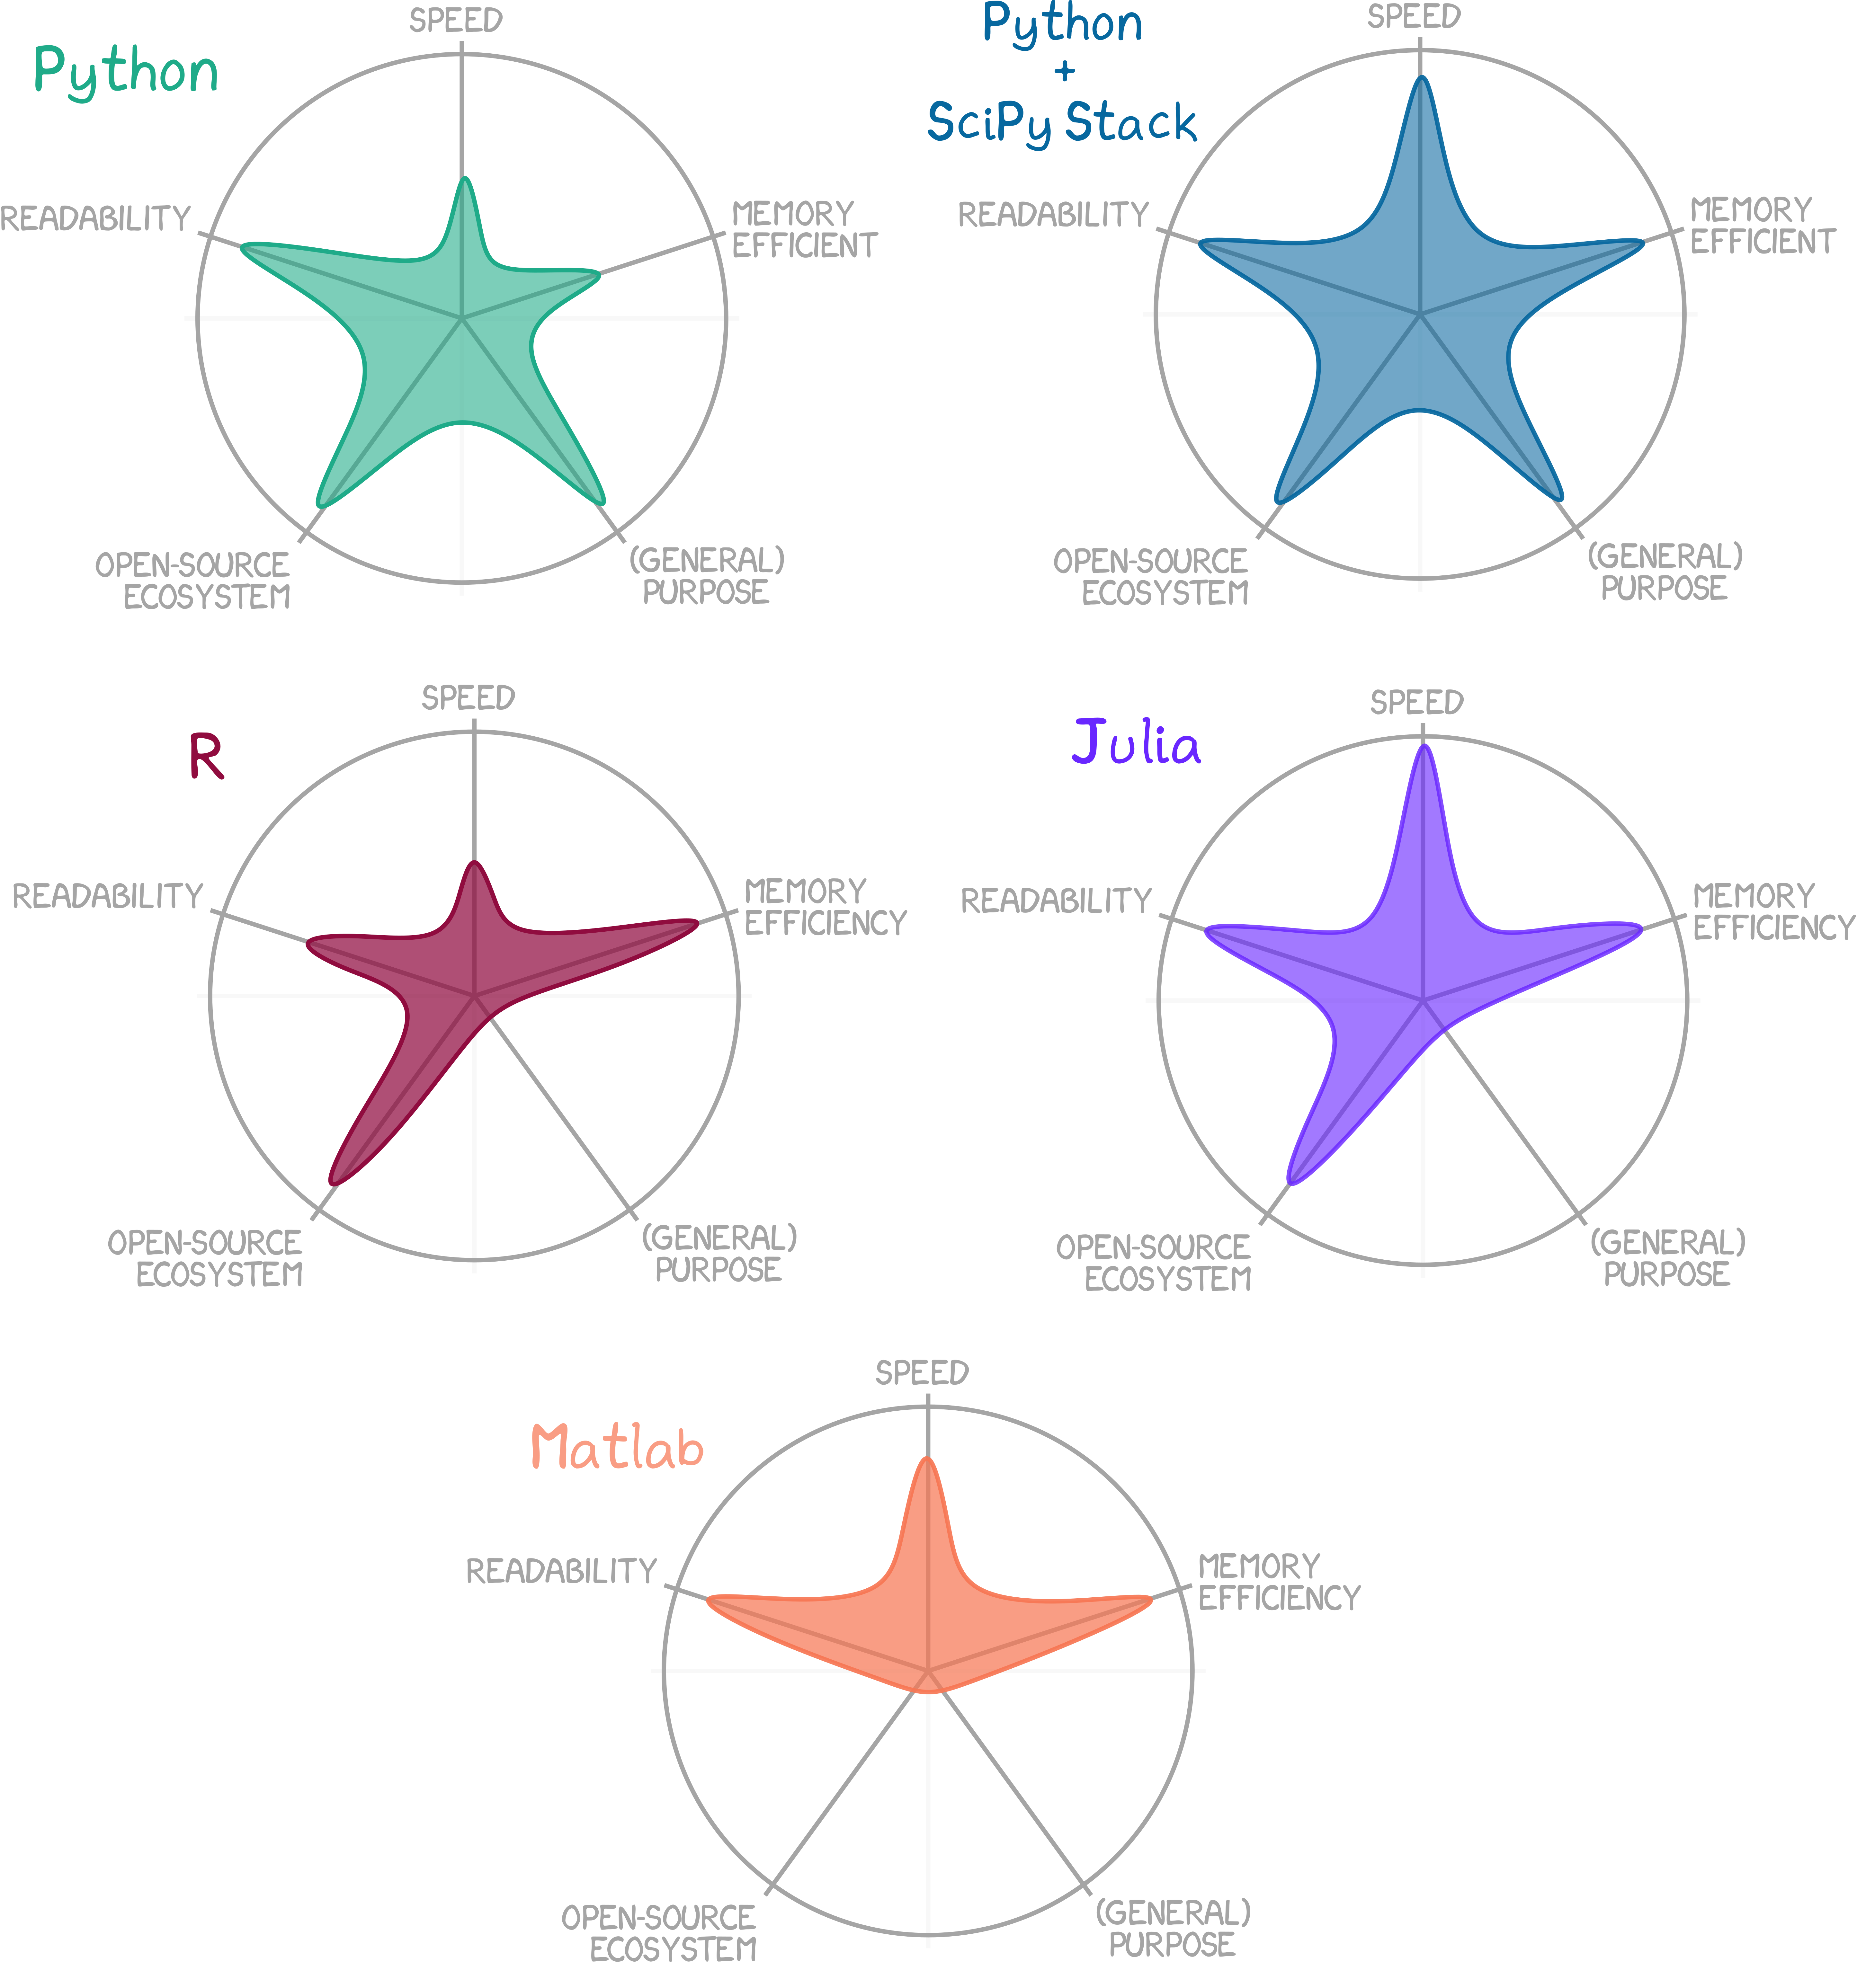

In [1]:
from IPython.display import Image

Image("comparison.png", width=600)

## Common criticism of Python
>Python is slow and inefficient. 

What does that even mean?

In [2]:
from utils import timeit, print_sizeof

Let's compute the square of a bunch of numbers:

$$
y = x^2
$$

where x = {1,..., 10000}.

In [3]:
x = range(1, 10001)
y = x**2

TypeError: unsupported operand type(s) for ** or pow(): 'range' and 'int'

In [4]:
y = []
for i in x:
    y.append(i**2)

print(y[-1])

100000000


In [5]:
@timeit
def square_of_x(x):
    y = []
    for i in x:
        y.append(i**2)
    return y

In [6]:
y = square_of_x(x)

square_of_x took: 0.0058391094 seconds


### Lists are slow. Why?

Lists are extremely *flexible*. 

In [10]:
my_list = [0, "a string", 2.6, [0,1,2], square_of_x]
my_list

[0,
 'a string',
 2.6,
 [0, 1, 2],
 <function utils.timeit.<locals>.call(*args, **kwargs)>]

Lists must be prepared for any type of element. There is overhead.

### Lists are (memory) inefficient. Why?

In [11]:
print_sizeof(y)

367,624 bytes


In [12]:
len(y) * 8

80000

## How can Python improve its speed and efficiency?

The scientific community wanted Python.

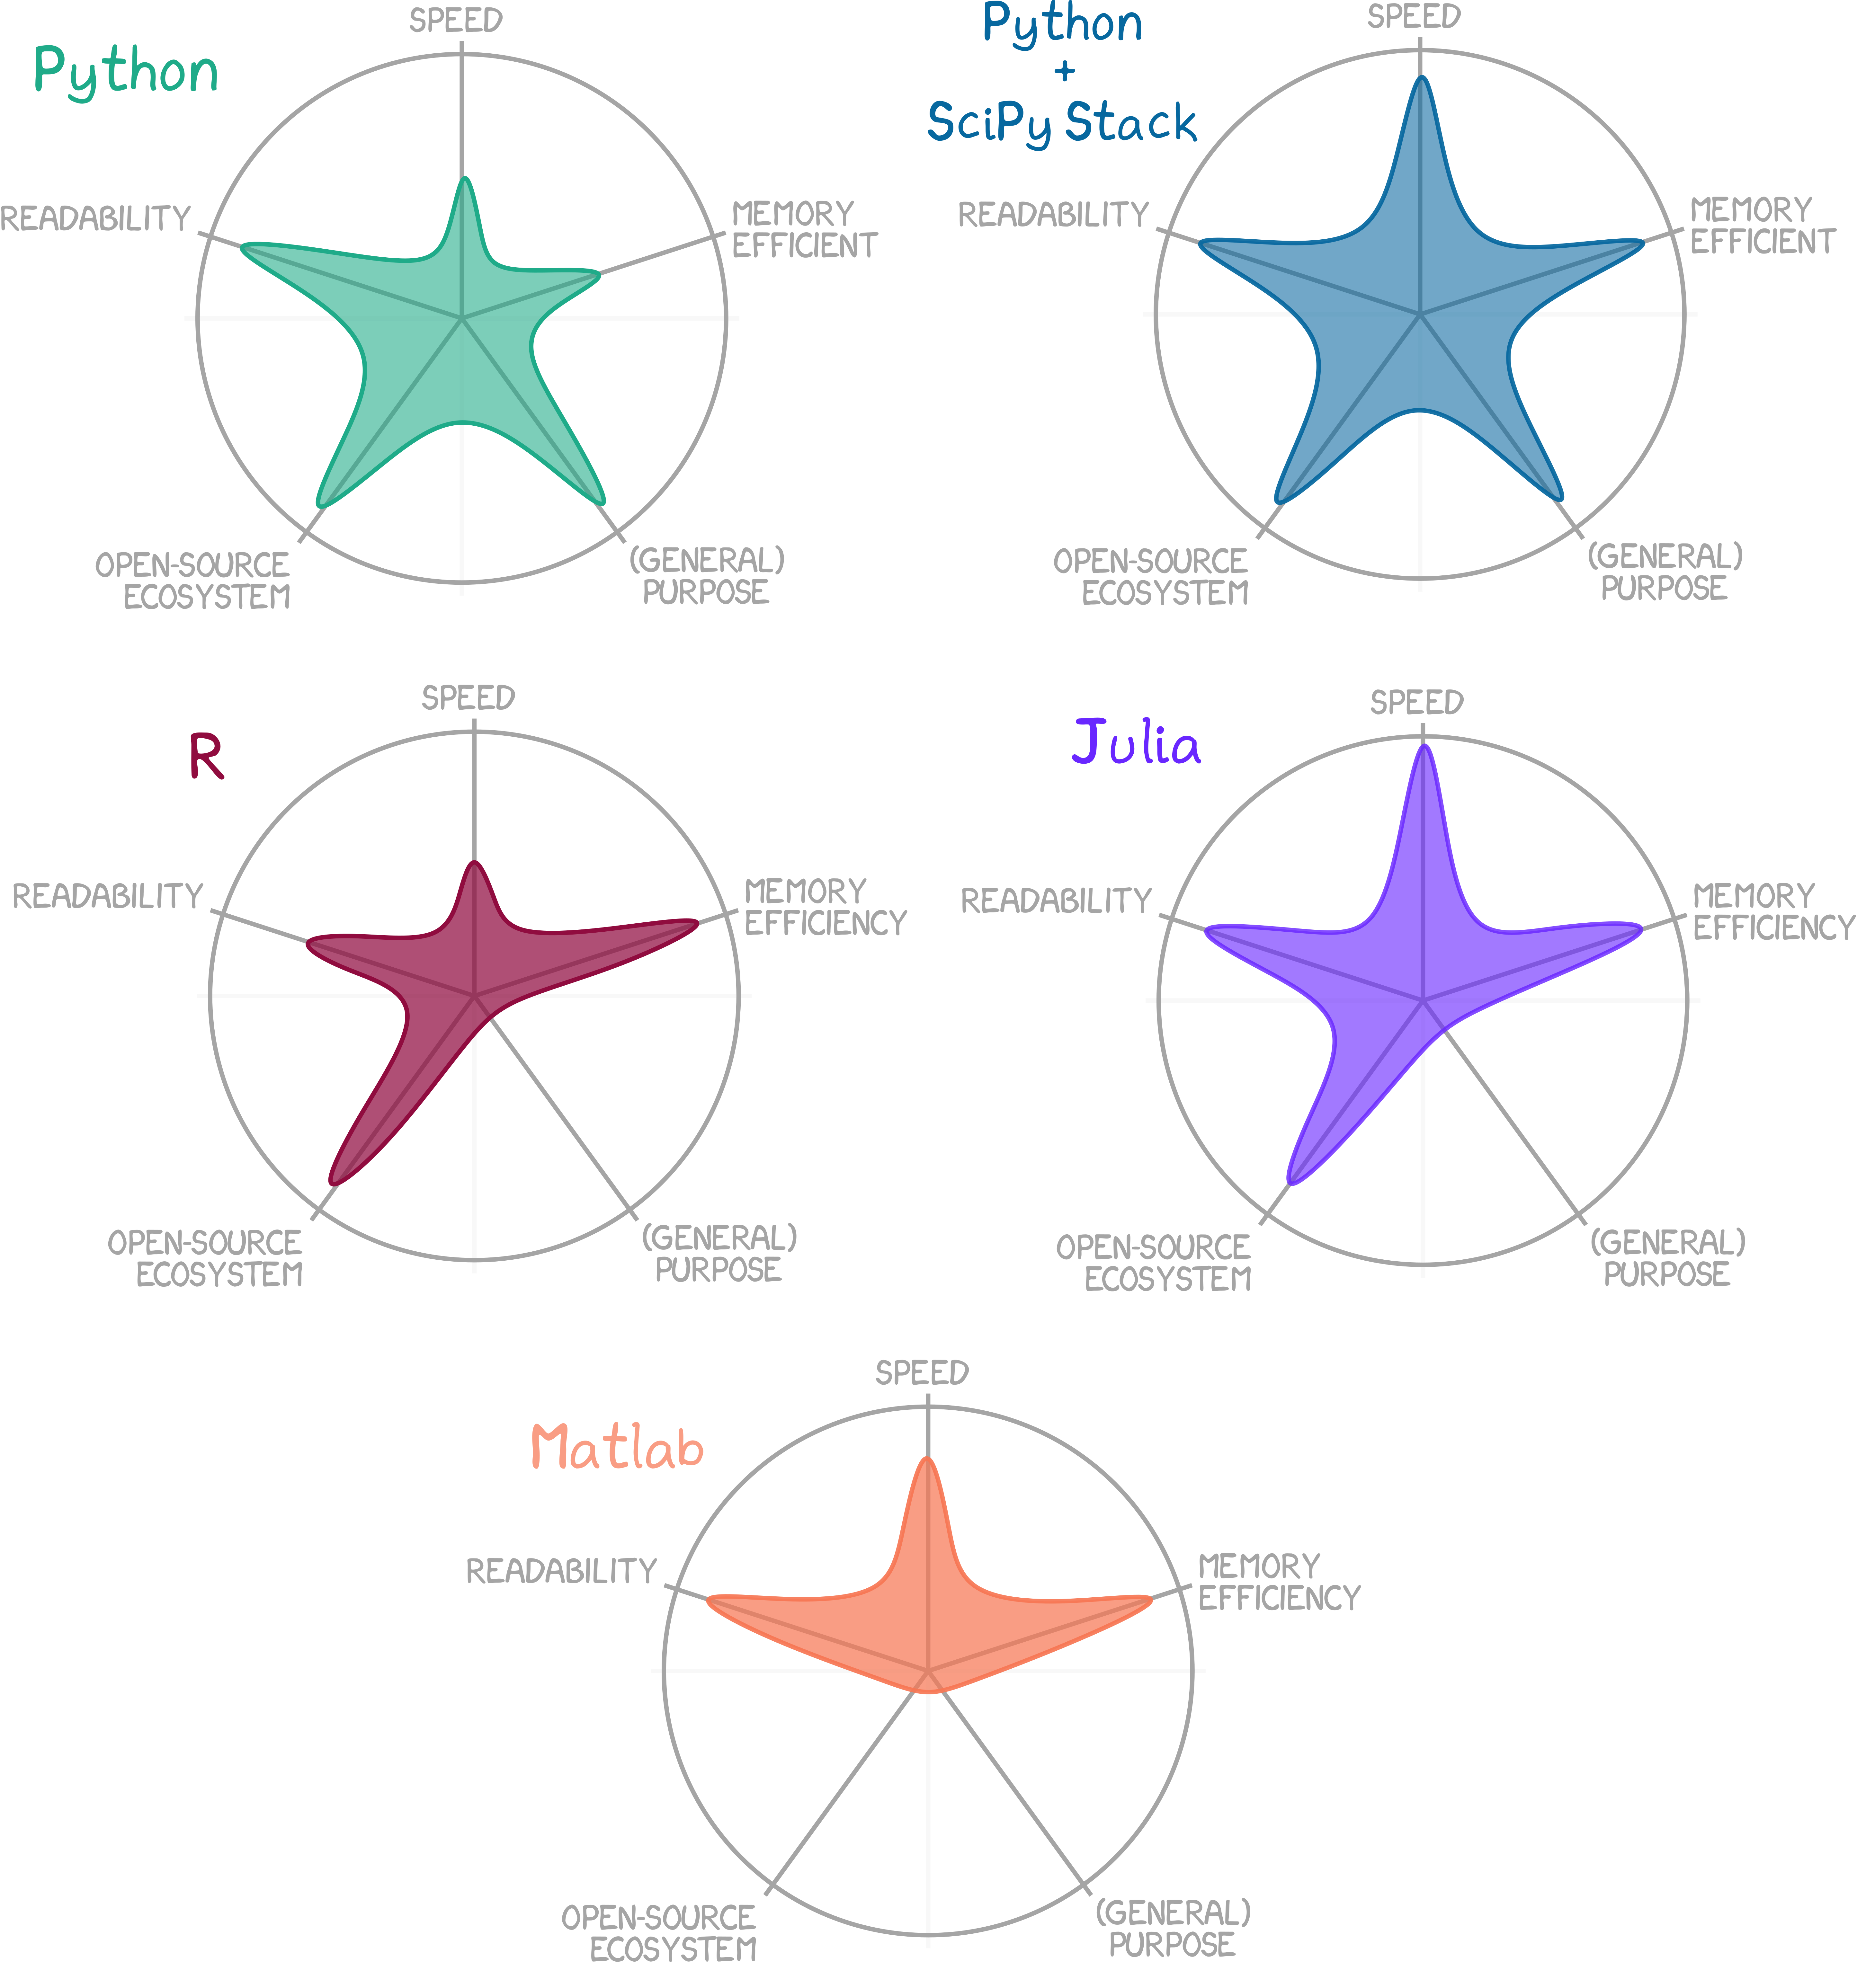

In [13]:
from IPython.display import Image

Image("comparison.png", width=600)

### Python is an interpreted language.

Compiled languages don't have the same flexibility, readability, and convenience as interpreted languages. They require that you *statically type* all your variables. This allows the **compiler** to assume things that **interpreters** cannot. 

The Python `list` is one example. Each element might be a different data type, so Python's interpreter cannot assume anything before hand. 

Every time Python enters a loop, it must *interpret each iteration separately*. It cannot infer the next step based on the previous step. This causes a slow-down. 

### How do we circumvent this?

Create a static-typed "list" where interpreters don't have to interpret each element separately.


### The NumPy Array

Numpy made a new data type called the `numpy.ndarray`. A numpy whole array can be interpreted once.  

In [14]:
import numpy as np

x = np.array(range(1, 10001))
y = x**2

It's fast.

In [15]:
@timeit
def square_of_x_arr(x):
    return x**2

y = square_of_x_arr(x)

square_of_x_arr took: 0.0000970364 seconds


And it's efficient

In [16]:
print_sizeof(y)

80,096 bytes


The numpy array is the foundation of the SciPy stack. It solved the speed/efficiency problem in Python.

**Statically typed arrays is the core data structure of Matlab. All computations are built on top of this datatype.**

## Why Pandas?

Datasets are usually comprised of a **labelled collection of arrays**. 

| time | growth |
|------|--------|
| 0    | 0      |
| 1    | 2      |
| 2    | 4      |
| 3    | 8      |
| 4    | 16     |
| 5    | 32     |

How would you create such a data structure in pure Python?

In [34]:
data = {
    'time': [0, 1, 2, 3, 4, 5],
    'growth': [0, 2, 4, 8, 16, 32]
}

Try squaring a "column".

In [35]:
data["growth"]**2

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [37]:
@timeit
def square_data(data):
    out = {}
    for key, val in data.items():
        new_val = []
        for i in val:
            new_val.append(i**2)
        out[key] = new_val
    return out

square_data(data)

square_data took: 0.0000112057 seconds


{'time': [0, 1, 4, 9, 16, 25], 'growth': [0, 4, 16, 64, 256, 1024]}

In [38]:
print_sizeof(data)

868 bytes


Change each value to a numpy array.

In [39]:
data = {
    'time': np.array([0, 1, 2, 3, 4, 5]),
    'growth': np.array([0, 2, 4, 8, 16, 32])
}

In [40]:
print_sizeof(data)

684 bytes


In [41]:
data["growth"]**2

array([   0,    4,   16,   64,  256, 1024])

Now try to square **multiple** labelled columns.

In [24]:
data["time", "growth"]**2

KeyError: ('time', 'growth')

Nope.

In [25]:
data[["time", "growth"]**2

SyntaxError: unexpected EOF while parsing (<ipython-input-25-73f37efe9938>, line 1)

Still no.

In [26]:
print(data["time"]**2)
print(data["growth"]**2)

[ 0  1  4  9 16 25]
[   0    4   16   64  256 1024]


Each element has to be squared separately. Not only is that annoying to code, it's **slow**.

## The (Pandas) DataFrame

In [27]:
import pandas as pd

df = pd.DataFrame(data)

df[["time", "growth"]]**2

time  growth
0     0       0
1     1       4
2     4      16
3     9      64
4    16     256
5    25    1024

Even better...

In [31]:
@timeit
def square_df(df):
    return df**2

square_df(df)

square_df took: 0.0012199879 seconds


time  growth
0     0       0
1     1       4
2     4      16
3     9      64
4    16     256
5    25    1024

And it's extremely memory efficient.

In [28]:
print_sizeof(df)

200 bytes


The fundamental advantage that Pandas gave Python is the concept of **labelled collection of arrays**.

**The DataFrame is the core data type of the R programming language.**

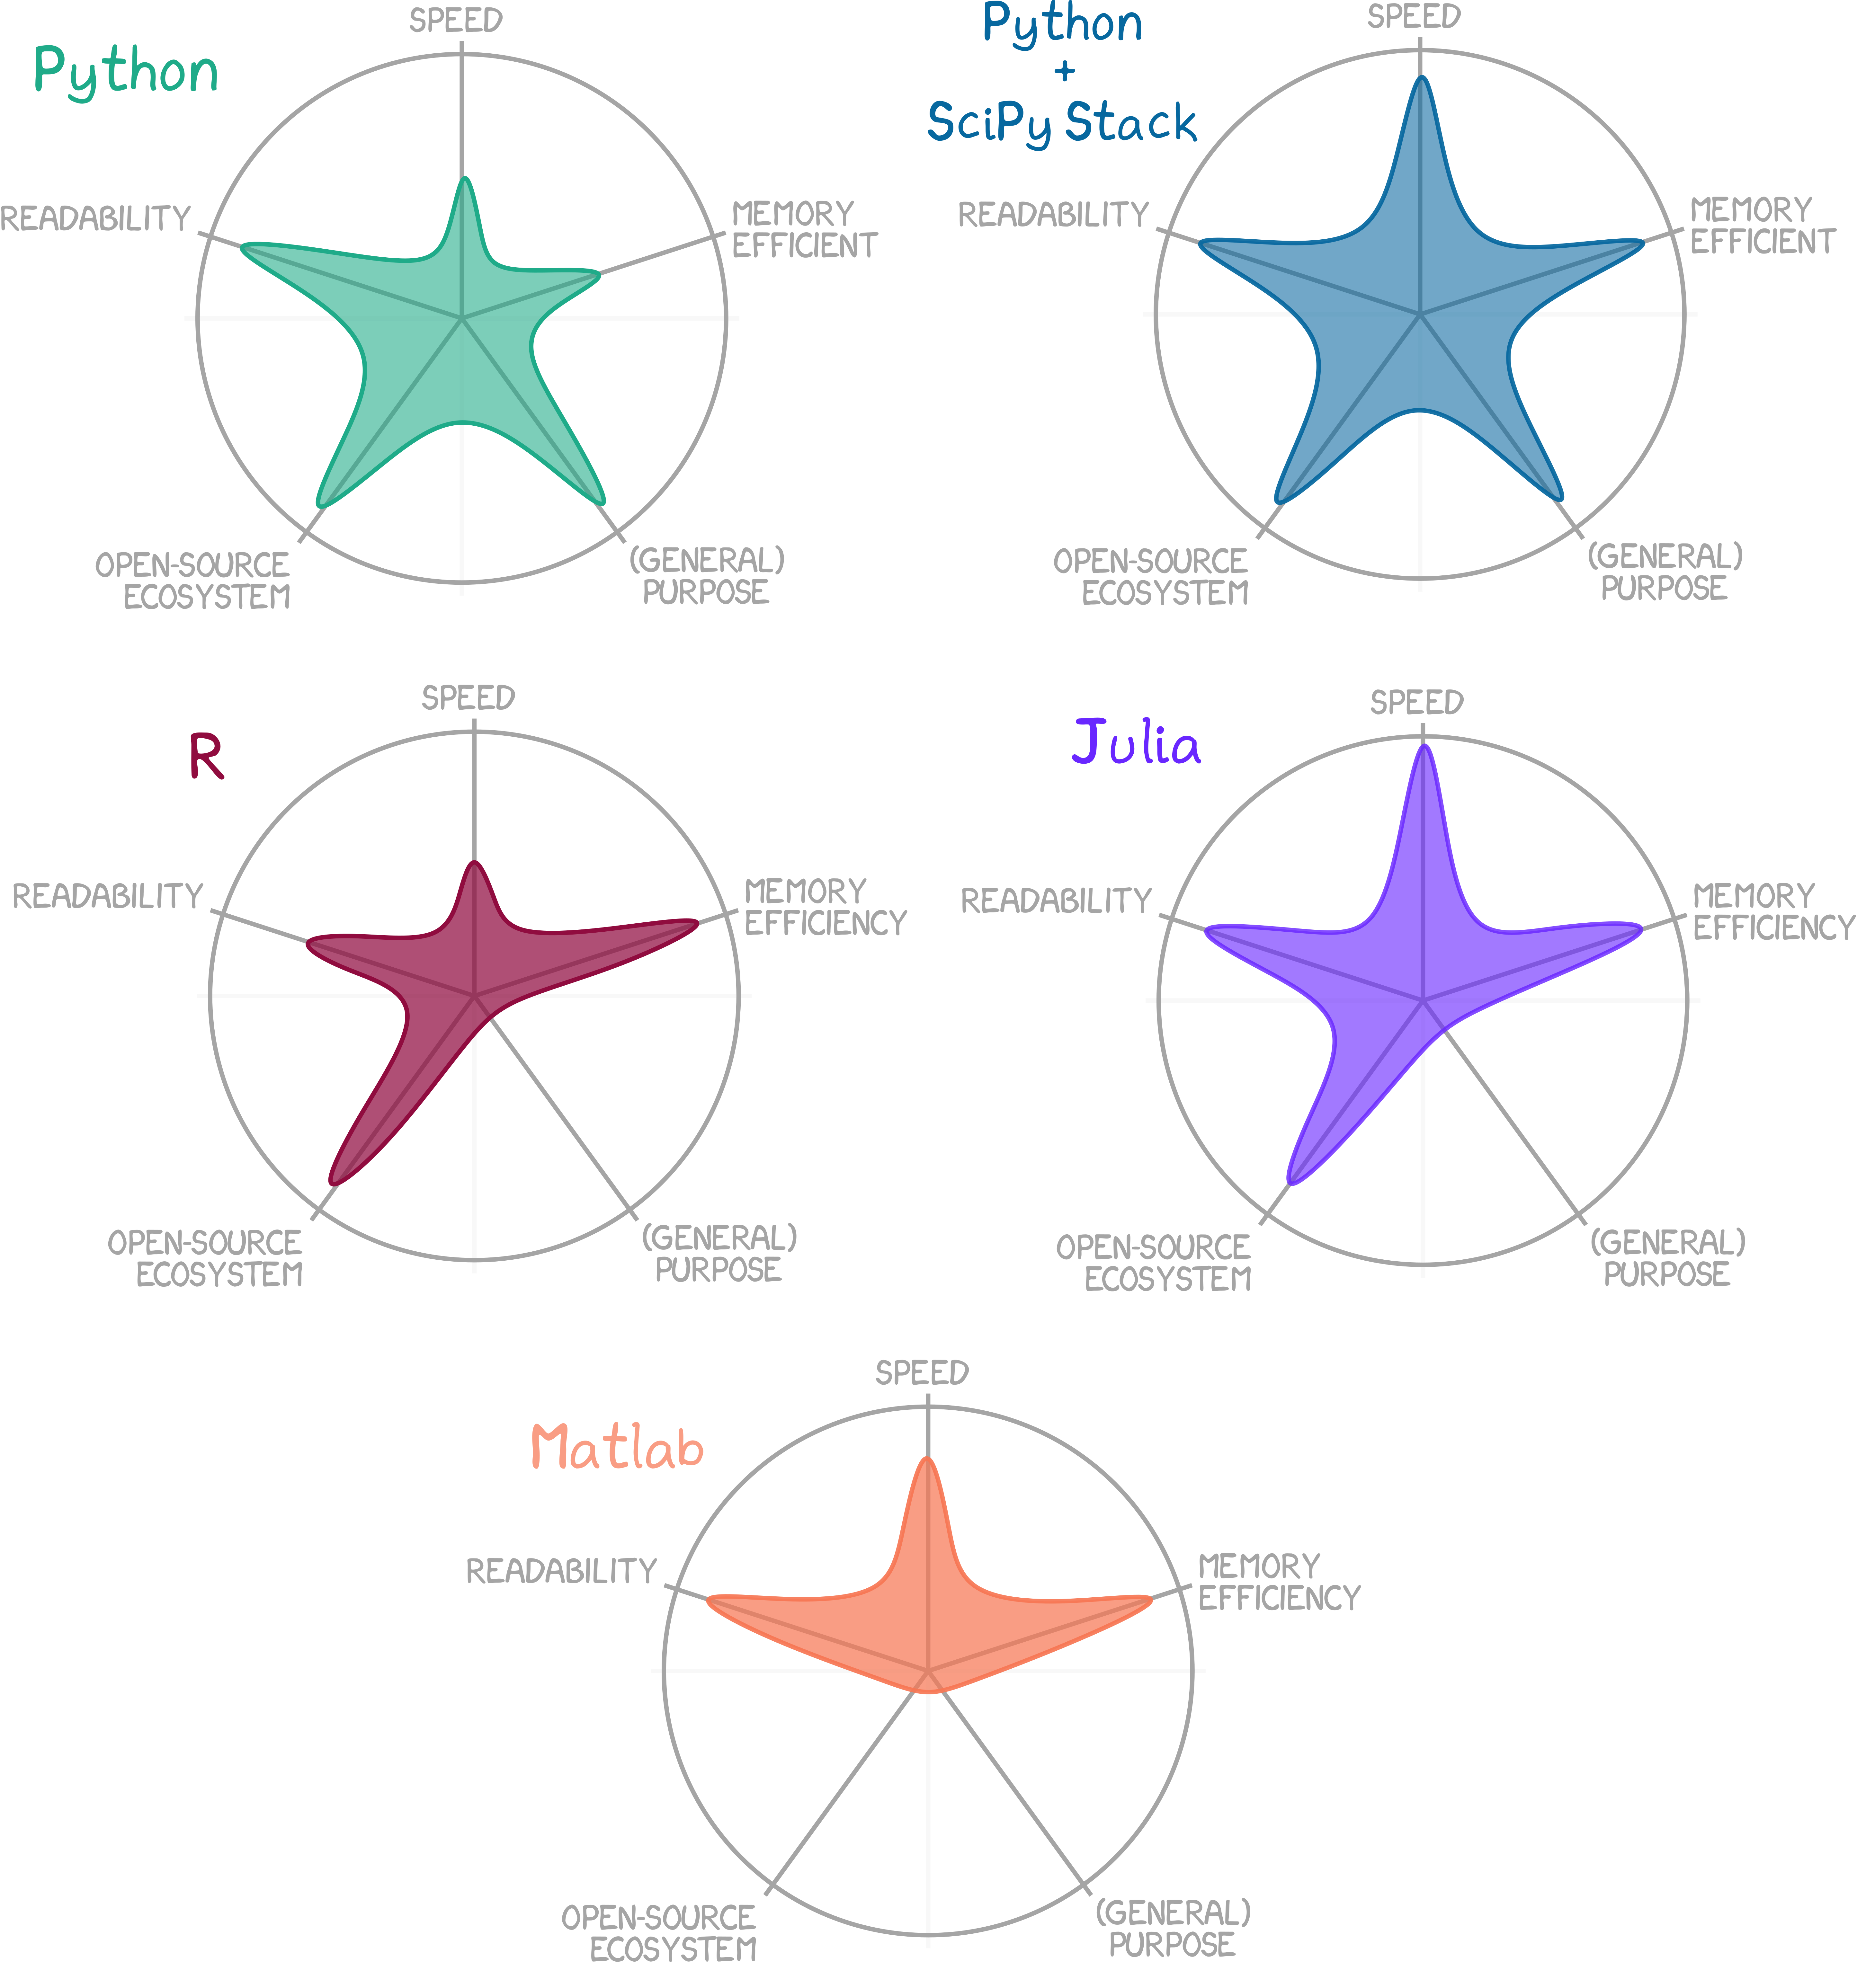

In [28]:
from IPython.display import Image

Image("comparison.png", width=600)